---
**Author:** Miao Zhu

**Date:** March 25, 2024

## Description

"This Jupyter Notebook aims reproduce the major analysis in Fig. 4",

## Related Figures
+ Fig 4.
---

In [1]:
import pandas as pd
import numpy as np
import numba
import pylab
import cassiopeia as cas
import matplotlib as cm
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set_theme(style="ticks", rc = {"axes.spines.right": False, "axes.spines.top": False , "pdf.fonttype": 42})

In [14]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('retina')

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### prepare

Loading the transcriptomic AnnData object.

In [ ]:
import scanpy as sc

In [5]:
adata = sc.read_h5ad('/path/to/EBcombined.h5ad')
adata.obs['sample'] = adata.obs['orig.ident'].map({'EB6':'D8a', 'EB7':'D10a', 'EBd8':'D8b', 'EBd10':'D10b', 'EBd12':'D12','EBd14':'D14'})
adata = adata[adata.obs['sample']=='D10a']
adata.obs.set_index(adata.obs.index.to_series().str.split('_',expand=True).loc[:,:1].agg('_'.join, axis=1), inplace = True)

Loading the Newick file for each clone.

In [6]:
import glob
dir_path = r'/path/to/*_tree.newick'
dirs = glob.glob(dir_path, recursive=True)
dirs.sort()

In [8]:
tree_dict = dict(map(lambda x,y: (x, pd.read_table(y)),
                     list(map(lambda x: x.split("/")[-1].split('_')[1], dirs)),
                     dirs))

In [9]:
### get clone id
clones = list(map(lambda x: x.split("/")[-1].split('_')[1], dirs))

Loading allele table

In [11]:
allele_table = pd.read_csv('/path/to/allele_table_greedy.csv',
                          index_col=0,keep_default_na=False)

allele_table['lineageGrp'] = allele_table.lineageGrp.astype('str')

Create a pseudo-tree

In [12]:
tree_list = {}

for i in clones:
    tmp = cas.data.utilities.newick_to_networkx(tree_dict[i].columns.format()[0])
    ### filter clade only include 1 cell
    if tmp.number_of_nodes() < 1: continue
    ### get the leaf tips
    tips = [node for node, out_degree in tmp.out_degree() if out_degree == 0]
    
    indel_priors = cas.pp.compute_empirical_indel_priors(
        allele_table[(allele_table['lineageGrp'] == i) & (allele_table.cellBC.isin(tips))], grouping_variables=["lineageGrp", "intBC"]
    )

    (character_matrix,
    priors,
    state_to_indel,
    ) = cas.pp.convert_alleletable_to_character_matrix(
        allele_table[(allele_table['lineageGrp'] == i) & (allele_table.cellBC.isin(tips))],
        allele_rep_thresh=1, mutation_priors=indel_priors
    )

    tree = cas.data.CassiopeiaTree(character_matrix=character_matrix, priors=priors)
    
    tree.populate_tree(tmp)
    
    tree_list.update({i:[tree, character_matrix, priors, state_to_indel]})

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/12 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/12 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/12 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/24 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/24 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/12 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/16 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/20 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/12 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/16 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/12 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/8 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/4 [00:00<?, ?it/s]

Dropping the following intBCs due to lack of diversity with threshold 1: []


Processing characters:   0%|          | 0/24 [00:00<?, ?it/s]

In [13]:
for i in tree_list.keys():
    print(f"clone{i}: {tree_list[i][0].n_cell}")

clone10: 8
clone11: 26
clone12: 37
clone13: 32
clone14: 4
clone15: 11
clone17: 33
clone18: 36
clone19: 3
clone20: 12
clone21: 16
clone22: 19
clone23: 11
clone24: 23
clone25: 17
clone26: 8
clone27: 26
clone28: 25
clone29: 4
clone2: 27
clone30: 24
clone31: 26
clone32: 20
clone33: 18
clone34: 18
clone35: 5
clone36: 4
clone37: 17
clone38: 13
clone39: 15
clone3: 65
clone40: 15
clone41: 4
clone4: 57
clone5: 21
clone6: 13
clone7: 49
clone8: 28
clone9: 32


In [15]:
### Import `tree_utils` for manipulating trees.
import tree_utils as tree_utils

In [16]:
### Convert to NetworkX format, assign depth to each node, and set the leaf size
G_dict = {}
for i in tree_list.keys():
    G = tree_list[i][0]._CassiopeiaTree__network.copy()

    root = [n for n in G if G.in_degree(n) == 0][0]
    G = tree_utils.set_depth(G, root)
    
    G = tree_utils.set_progeny_size(G, root)
    
    G_dict.update({i:G})

Computing progeny size for each internal node: 100%|██████████| 45/45 [00:00<00:00, 37953.69it/s]


### annotation

Loading the cell type annotation

In [17]:
anno = pd.read_csv("/path/to/EBcombined_meta.csv",keep_default_na=False)
anno['sample'] = anno['orig.ident'].map({'EB6':'D8a', 'EB7':'D10a', 'EBd8':'D8b', 'EBd10':'D10b', 'EBd12':'D12','EBd14':'D14'})
anno['cellBC'] = anno['cellBC'].str.split('_',expand=True).loc[:,:1].agg('_'.join, axis=1)

In [18]:
### subset "D10a"
anno = anno[anno['sample'] == "D10a"]
anno = anno.set_index('cellBC')['cell_type']

In [19]:
### make a "celltype" cmap pallete
cell_type = ['Heart','Neuron', 'Gut','Blood', 'CPM','PGC-like','Endothelium', 'Unknow']
colors = ['#1F77B4','#FF7F0E','#2CA02C','#D62728','#9467BD','#8C564B','#E377C2', 'grey']
cl_cols = dict(zip(cell_type, colors))

cm.colormaps.register(cm.colors.ListedColormap(list(cl_cols.values())), name='celltype')

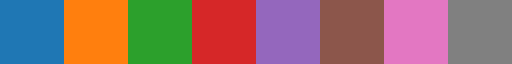

In [20]:
cm.colormaps.get_cmap('celltype')

Add cell type annotation to the tree leaf.

In [21]:
leaf_anno = anno.reset_index()
leaf_anno['color'] = leaf_anno['cell_type'].map(cl_cols).map(str)

In [22]:
for i in tree_list.keys():
    df = leaf_anno.set_index('cellBC').loc[tree_list[i][0].leaves]
    df = pd.merge(df.reset_index(),
                  pd.DataFrame({'color' : list(cl_cols.values()), 'order' : range(len(cl_cols))}),
                  how='left').set_index('cellBC')
    tree_list[i][0].cell_meta = df

### node selection

Here, we adapted the Laplace-corrected multiway splits information gain, which was initially designed to find the optimal multiway split for a numeric attribute of a non-bipartition decision tree, to quantify the amount of information gained about the cell type attribute of leaves from observing the branch splits([Eibe et al.](https://www.cs.waikato.ac.nz/~eibe/pubs/multiway.pdf))
$$
IG=-\frac{1}{S} \sum_{c=1}^CS_c \log \left(\frac{S_c+1}{S+C}\right)+\frac{1}{S} \sum_{i=1}^k \sum_{c=1}^CS_{c, i} \log \left(\frac{S_{c, i}+1}{S_i+C}\right)
$$

In [26]:
from collections import Counter
import math

In [27]:
np.random.seed(42)
res = {}
for clone in G_dict.keys():
    G = tree_utils.assign_meta(G_dict[clone], anno)
    root = [n for n in G if G.in_degree(n) == 0][0]

    total_result = {}

    max_depth = tree_utils.get_max_depth(G, root)
    internal_nodes = [node for node in G.nodes() if G.in_degree(node) >= 0 and G.out_degree(node) > 0]
    leaves = [x for x in G.nodes() if G.out_degree(x) == 0 and G.in_degree(x) == 1]

    for node in internal_nodes:

        father_depth = G.nodes[node]['depth']
        successors = list(G.successors(node))

        if len(list(set(successors) & set(internal_nodes))) < 1:
            continue;

        children = tree_utils.get_children_of_clade(G, node)

        leaves_counts = Counter([G.nodes[i]['meta'] for i in children])
        total_leaves = sum(leaves_counts.values())
        
        ### skip node size samller than 10
        if total_leaves < 10:
            continue
        
        initial_entropy = 0.0
        for count in leaves_counts.values():
            ### Laplace correction
            probability = (count + 1) / (total_leaves + len(leaves_counts))
            ### 
            initial_entropy -= probability * math.log(probability, 2)

        children_of_successors = dict((i , tree_utils.get_children_of_clade(G,i)) for i in successors if i in internal_nodes) 

        if len(list(set(successors) & set(leaves))) > 0:
            children_of_successors['collapsed_node'] = list(set(successors) & set(leaves))

        successor_entropy = {}
        successors_counts = {}
        for successor in children_of_successors.keys():
            successors_counts[successor] = Counter([G.nodes[i]['meta'] for i in children_of_successors[successor]])
            conditional_entropy = 0.0
            for count in successors_counts[successor].values():
                ### Laplace correction
                probability = (count + 1) / (len(children_of_successors[successor]) + len(leaves_counts))
                ###
                conditional_entropy -= probability * math.log(probability, 2)

            successor_entropy[successor] = conditional_entropy * (len(children_of_successors[successor]) / total_leaves)

        information_gain = initial_entropy - np.sum(list(successor_entropy.values()))

        #### permutation
        children_state = pd.DataFrame([ G.nodes[i]['meta'] for i in children ],index=children, columns=['state'])
        permuted_assignments = children_state.copy()
        permuted_assignments.index = np.random.permutation(permuted_assignments.index.values)

        permuted_assignments_IG = {}
        for B in range(1000):

            permuted_assignments_counts = {}
            permuted_assignments_entropy = {}

            for successor in children_of_successors.keys():
                permuted_assignments_counts[successor] = Counter([ permuted_assignments.loc[i,'state'] for i in children_of_successors[successor]])
                conditional_entropy = 0.0

                for count in permuted_assignments_counts[successor].values():
                    ### Laplace correction
                    probability = (count + 1) / (len(children_of_successors[successor]) + permuted_assignments['state'].nunique())
                    ###
                    conditional_entropy -= probability * math.log(probability, 2)

                permuted_assignments_entropy[successor] = conditional_entropy * (len(children_of_successors[successor]) / total_leaves)

            permuted_assignments_IG[B] = initial_entropy - np.sum(list(permuted_assignments_entropy.values()))

        null_mean = np.mean(list(permuted_assignments_IG.values()))
        null_std = np.std(list(permuted_assignments_IG.values()))
        
        total_result[node] = {'node_name':node,'node_depth':father_depth,
                              'initial_celltype':leaves_counts, 'num_initial_celltype':len(leaves_counts),'num_leaves':total_leaves,
                              'successors':successors,'num_successors':len(successors),
                              'children_of_successors':children_of_successors,'successors_celltype':successors_counts,
                              'initial_entropy':initial_entropy,'successor_entropy':successor_entropy,
                              'null_mean':null_mean,'null_std':null_std,
                              'information_gain': information_gain,
                             }
        
    res[clone] = total_result

In [28]:
res_df = {}
for clone in res.keys():
    res_df[clone] = pd.DataFrame(res[clone]).T

In [29]:
for clone in res_df.keys():
    res_df[clone]['deviation'] = [row['information_gain'] - row['null_mean'] for index, row in res_df[clone].iterrows()]

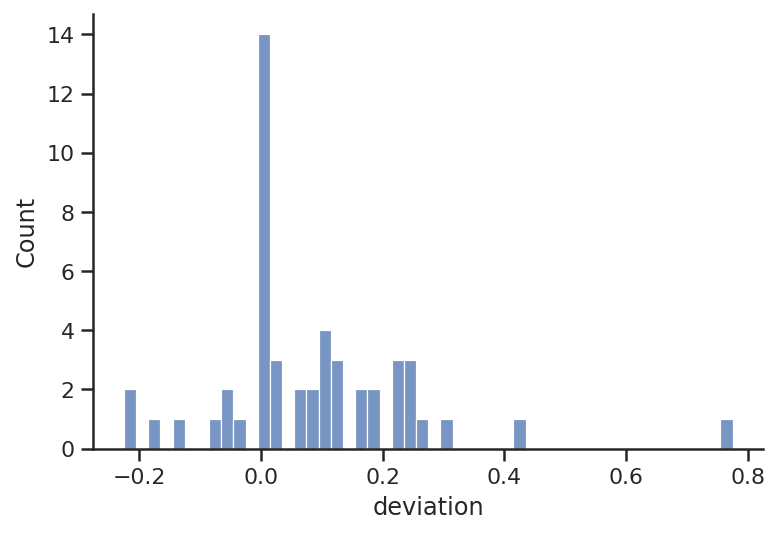

In [30]:
sns.histplot(pd.concat(res_df)['deviation'],bins=50);

scinfogain

In [ ]:
def find_matching_key(dictionary, string):
    for key, value in dictionary.items():
        if string in value:
            return key
    return None

In [32]:
res_leaf = {}

for clone in res_df.keys():
    
    if res_df[clone].empty:
        continue;
    
    G = tree_utils.assign_meta(G_dict[clone], anno).copy()
    
    leaves_IG = {}
    root = [n for n in G if G.in_degree(n) == 0][0]
    leaves = [x for x in G.nodes() if G.out_degree(x) == 0 and G.in_degree(x) == 1]

    for leaf in leaves:
        leaf_IG = []
        parent = [i for i in G.predecessors(leaf)][0]
        while True:
            if parent in res_df[clone].node_name:
                leaf_IG.append(res_df[clone].loc[parent]['deviation'])
            if parent == root:
                break
            parent = [i for i in G.predecessors(parent)][0]

        leaves_IG[leaf] = np.mean(leaf_IG)
    
    res_leaf[clone] = leaves_IG

In [33]:
leaf_infogain_df = pd.DataFrame()
for i in res_leaf.keys():
    leaf_infogain_df = pd.concat([leaf_infogain_df, pd.DataFrame.from_dict(res_leaf[i], orient='index',columns=['deviation'])])

In [34]:
leaf_infogain_df['cell_type'] = leaf_anno.set_index('cellBC').loc[leaf_infogain_df.index].cell_type

In [35]:
celltype_percent = leaf_infogain_df.cell_type.value_counts() / leaf_infogain_df.shape[0]

In [36]:
leaf_infogain_df.cell_type.value_counts()

Heart          530
Gut            161
PGC-like        45
Endothelium     22
Blood            8
CPM              1
Name: cell_type, dtype: int64

In [37]:
celltype_percent

Heart          0.691004
Gut            0.209909
PGC-like       0.058670
Endothelium    0.028683
Blood          0.010430
CPM            0.001304
Name: cell_type, dtype: float64

In [38]:
leaf_infogain_df = leaf_infogain_df[leaf_infogain_df['cell_type'].isin(celltype_percent.index[celltype_percent > 0.01])]

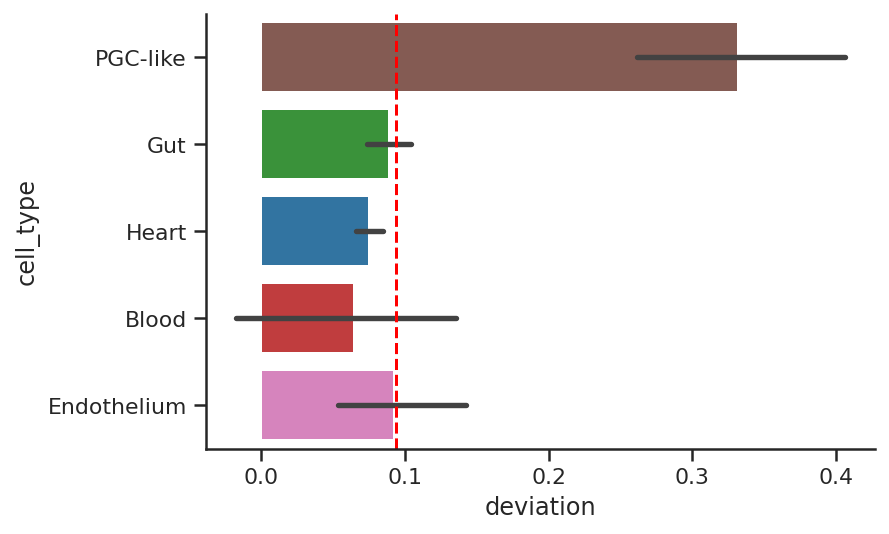

In [40]:
sns.barplot(data=leaf_infogain_df, x='deviation',y='cell_type',palette=cl_cols);
plt.axvline(x=np.mean(leaf_infogain_df.deviation), color='red', linestyle='--')
plt.show()

In [41]:
import networkx as nx

In [42]:
tmp_tree = nx.DiGraph()
root = 'root'
tmp_tree.add_node(root)
clade_nodes = []

for i in tree_list.keys():
    G = tree_list[i][0]._CassiopeiaTree__network.copy()
    
    rename_dictionary = {}
    for n in [node for node in G.nodes() if G.in_degree(node) >= 0 and G.out_degree(node) > 0]:
        rename_dictionary[n] = i+'_'+str(n)
        
    G = nx.relabel_nodes(G, rename_dictionary)
    
    child = [n for n in G if G.in_degree(n) == 0][0]
    tmp_tree.add_edge(root, child)
    clade_nodes.append(child)

    tmp_tree = nx.compose(tmp_tree, G)

len([n for n in tmp_tree if tmp_tree.out_degree(n) == 0])

822

In [43]:
tree_full = cas.data.CassiopeiaTree()
tree_full.populate_tree(tmp_tree)

In [44]:
df = leaf_anno.set_index('cellBC').loc[tree_full.leaves]
df = pd.merge(df.reset_index(),
              pd.DataFrame({'color' : list(cl_cols.values()), 'order' : range(len(cl_cols))}),
              how='left').set_index('cellBC')
tree_full.cell_meta = df

In [45]:
tree_full.cell_meta['deviation'] = [ leaf_infogain_df.loc[i]['deviation'] if i in leaf_infogain_df.index else 0 for i in tree_full.cell_meta.index ]

In [ ]:
### Import `local` module for tree plotting.
import local as local

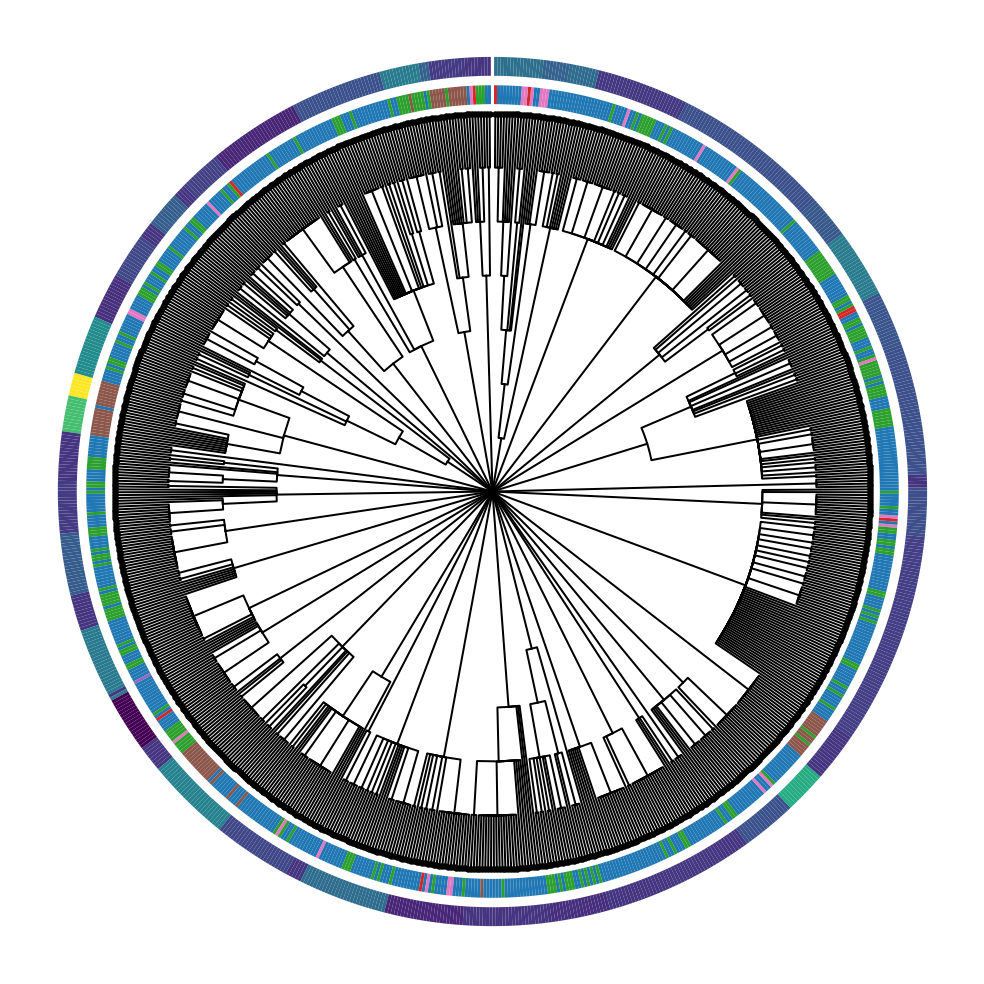

In [47]:
local.plot_matplotlib(tree_full,
                       meta_data=['cell_type','deviation'],
                       categorical_cmap='celltype',
                       value_mapping = dict(zip(tree_full.cell_meta.cell_type, tree_full.cell_meta.order)),
                      );